In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('heart_disease_uci.csv')

# Explore the data
print(df.info())
print(df.describe())
print(df['num'].value_counts())  # Target variable (0 = no disease, 1-4 = disease)

# Create binary target (0 = no disease, 1 = disease)
df['heart_disease'] = (df['num'] > 0).astype(int)

# Select features - focusing on numerical ones for simplicity
features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
X = df[features]
y = df['heart_disease']

# Handle missing values (simple imputation)
X = X.fillna(X.mean())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  

In [2]:
# Initialize and train logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict probabilities and classes
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)  # Default threshold of 0.5

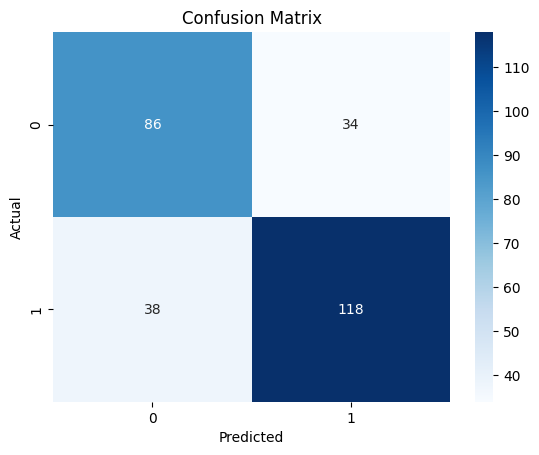

In [3]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [4]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       120
           1       0.78      0.76      0.77       156

    accuracy                           0.74       276
   macro avg       0.73      0.74      0.74       276
weighted avg       0.74      0.74      0.74       276



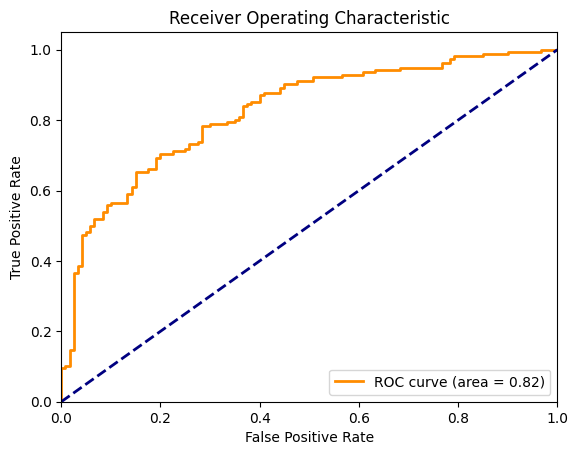

In [5]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [6]:
# Try different thresholds
thresholds = np.arange(0.1, 1.0, 0.1)
for threshold in thresholds:
    y_pred_thresh = (y_pred_proba > threshold).astype(int)
    print(f"\nThreshold: {threshold:.1f}")
    print(classification_report(y_test, y_pred_thresh))


Threshold: 0.1
              precision    recall  f1-score   support

           0       1.00      0.03      0.05       120
           1       0.57      1.00      0.73       156

    accuracy                           0.58       276
   macro avg       0.79      0.51      0.39       276
weighted avg       0.76      0.58      0.43       276


Threshold: 0.2
              precision    recall  f1-score   support

           0       0.79      0.26      0.39       120
           1       0.62      0.95      0.75       156

    accuracy                           0.65       276
   macro avg       0.71      0.60      0.57       276
weighted avg       0.70      0.65      0.60       276


Threshold: 0.3
              precision    recall  f1-score   support

           0       0.82      0.47      0.60       120
           1       0.69      0.92      0.79       156

    accuracy                           0.72       276
   macro avg       0.76      0.69      0.69       276
weighted avg       0.75   

In [7]:
# Get coefficients and corresponding feature names
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': logreg.coef_[0]
})

# Sort by absolute value of coefficient
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print(coefficients)

    Feature  Coefficient  Abs_Coefficient
4   oldpeak     0.901993         0.901993
3    thalch    -0.669484         0.669484
2      chol    -0.478512         0.478512
0       age     0.148343         0.148343
1  trestbps     0.101392         0.101392
